In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import glob
import cPickle as pickle

In [4]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [5]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [7]:
for i in range(1,6):
    for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure4.data_to_type'+str(i)):
    #     print subdir
        if len(subdir.split('/')) == 9:
          if len(os.listdir(subdir)) != 8:
            print subdir, len(os.listdir(subdir))

    #         classifier = subdir.split('/')[-1]
    #         dataset = subdir.split('/')[-2]
    #         experiment = subdir.split('/')[-3]

    #         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [27]:
all_stats = [None]*5

for a in range(1,6):

    experiment = 'C.Figure4.data_to_type'+str(a)
    e_dir = os.path.join(RESULTS_DIR, experiment)
    datasets = sorted(os.listdir(e_dir))

    stats = [None]*4

    classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers):

        stats[i] = []
        c_dir = os.path.join(e_dir, c)

        stats_files = glob.glob(c_dir+'/*.p')
        stats_per_c = []
    #     print stats_files

        for s in stats_files:

            with open(s, 'r') as f:
                stats_from_file = pickle.load(f)
            stats_per_c.append(stats_from_file)
    #         print stats['time']

        stats[i].append(stats_per_c)
#     print stats
    all_stats[a-1] = stats
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

In [34]:
len(all_stats[0][0][0])

4

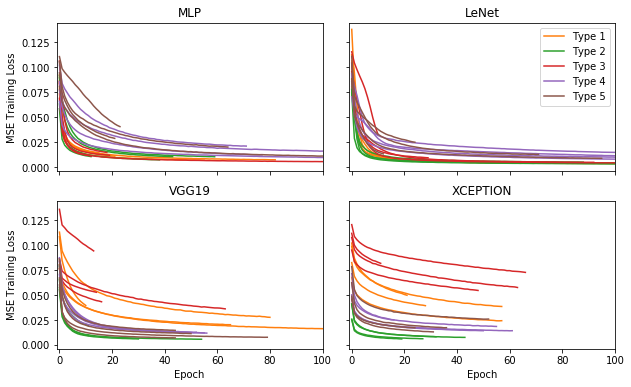

In [36]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Training Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for type_ in range(1,6):
        for sample in range(len(all_stats[0][0][0])):

            loss_for_type = all_stats[type_-1][i][0][sample]['loss']

            if sample == 0:
                # only label the first
                plot(loss_for_type, label='Type '+str(type_), color='C'+str(type_))
            else:
                # but use the same colors for all
                plot(loss_for_type, color='C'+str(type_))

            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure4_training_loss.pdf', bbox_inches='tight', pad_inches=0)

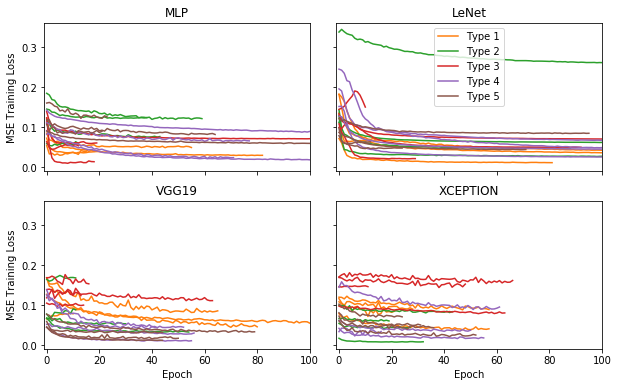

In [37]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Training Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for type_ in range(1,6):
        for sample in range(len(all_stats[0][0][0])):

            loss_for_type = all_stats[type_-1][i][0][sample]['val_loss']

            if sample == 0:
                # only label the first
                plot(loss_for_type, label='Type '+str(type_), color='C'+str(type_))
            else:
                # but use the same colors for all
                plot(loss_for_type, color='C'+str(type_))

            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure4_val_loss.pdf', bbox_inches='tight', pad_inches=0)

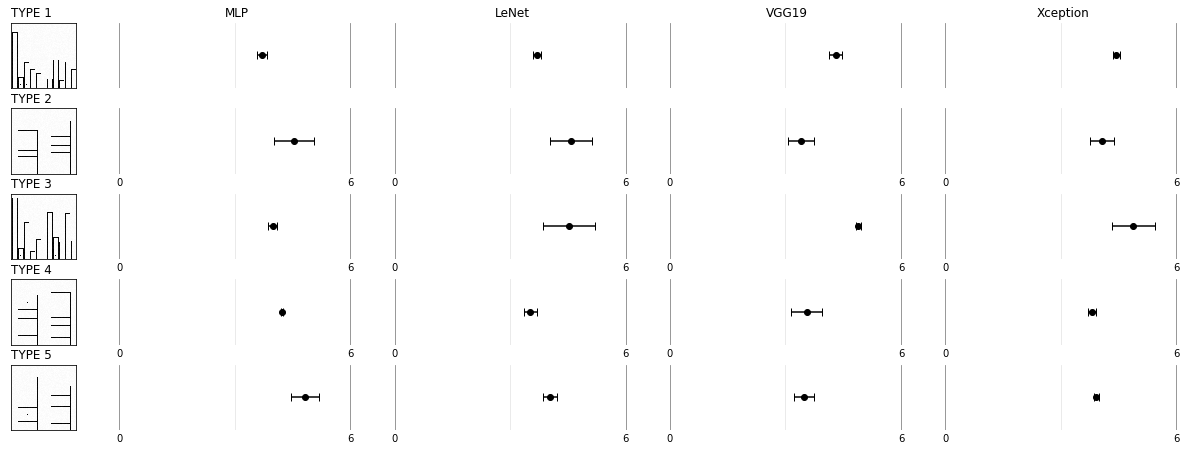

In [48]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

all_data = []
images = []

# titles = ['Framed Rectangles', 'Bars']

## data
no_samples = len(all_stats[0][0][0])


bar_data = [None]*4
all_data = [None]*4
classifiers = ['MLP', 'LeNet', 'VGG19', 'Xception']
for i, c in enumerate(classifiers):

    mlae_for_c = []
    
    for type_ in range(1,6):
        
        mlae_for_type = []
        
        for sample in range(len(all_stats[0][0][0])):

            mlae_for_sample = all_stats[type_-1][i][0][sample]['MLAE']

            mlae_for_type.append(mlae_for_sample)
    
        mlae_for_c.append(mlae_for_type)
        
    all_data[i] = mlae_for_c
    

## images
images = []
for type_ in range(1,6):
    data, labels = C.Figure4.generate_datapoint()
    
    image = eval('C.Figure4.data_to_type'+str(type_))(data)
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))

    images.append(image)


fig = plt.figure(figsize=(21,7.5), facecolor='white')
gs = gridspec.GridSpec(5, 5, width_ratios=[.3,1,1,1,1], hspace=.3)

j = 0 # grid index (running)

rows = 5
for row in range(rows):
    
    for i, c in enumerate(['Image']+classifiers):
        
        fig = plt.subplot(gs[j])
        j += 1
        
        if i==0:
            # this is the image

            plt.title('TYPE '+str(row+1), loc='left')

            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            ax.set_xticklabels('')
            ax.set_yticklabels('')
            
            plt.imshow(images[row], cmap='Greys', interpolation='none')
            
            continue

        #

        if row == 0:
            plt.title(c)

#         print row
        data = [all_data[i-1][row]]
#         print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
#         print sorted_data
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]
        
        means = [np.mean(r) for r in data]
        
        confidence = [1.96*np.std(r) for r in data]


        y_pos = range(len(means))


        plt.xlim(0,6.1)

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if row != 0:
        ax.get_yaxis().set_ticks([])
#         else:
#     #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)

        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
        # remove tick marks
        if row == 0:
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')

        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)

        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', color='black', capsize=4)
plt.savefig('../PAPER/gfx/figure4_mlae.pdf', bbox_inches='tight', pad_inches=0)

In [67]:
print [np.mean(all_data[v][0]) for v in range(4)]
print [np.mean(all_data[v][1]) for v in range(4)]
print [np.mean(all_data[v][2]) for v in range(4)]
print [np.mean(all_data[v][3]) for v in range(4)]
print [np.mean(all_data[v][4]) for v in range(4)]

[3.6905671097096628, 3.9354927801607418, 4.2610325221656158, 4.4729018126470734]
[4.5686923384905054, 4.4310868469274167, 3.8749778380871054, 4.018271184762698]
[4.0085432831713108, 4.4632906103161316, 4.869250975613868, 4.8890846974862985]
[4.089577017723788, 3.734775122381135, 3.6993808674319055, 3.8239672988308291]
[4.6318500751555494, 3.9815877602373657, 3.5045124131555503, 3.8868812842916487]


In [78]:
for type_ in range(5):
    MLAE_mean = np.mean([np.mean(all_data[v][type_]) for v in range(4)])
    print 'Type', type_+1, 'MLAE', MLAE_mean, 'Abs. Error', np.exp2(MLAE_mean)-.125

Type 1 MLAE 4.08999855617 Abs. Error 16.904905876
Type 2 MLAE 4.22325705207 Abs. Error 18.5528572583
Type 3 MLAE 4.55754239165 Abs. Error 23.4231593707
Type 4 MLAE 3.83692507659 Abs. Error 14.1649115011
Type 5 MLAE 4.00120788321 Abs. Error 15.8884014628
